# Ben Keeley

## Research question/interests

I am interested in discovering if free time and lesiure activities such as weekday alchol consumption, weekend alcohol consumption, relationships, going out with friends...etc determine whether a student is more likely to perform successfully or poorly by the end of a school term. Specifically I want to determine if a moderate amount of personal indulgence can benefit a students performance, and if so by how much. On the opposite end I hope to determine the exact threshold in which too much indulgence starts to impact academic performance.

In [ ]:
import pandas as pd
#Milestone 1

print("Maths")

df1 = pd.read_csv('../data/raw/Maths_formatted.csv', engine='python', on_bad_lines='skip')

display(df1)

print("Portuguese")
df2 = pd.read_csv('../data/raw/Portuguese_formatted.csv', engine='python', on_bad_lines='skip')

display(df2)

Maths


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9
395,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6


Portuguese


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11
649,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11


# Milestone 2

In [ ]:
#Add a column detailing the subject of each dataset
df1['subject'] = "math"
df2['subject'] = "portuguese"

#Combine our two datasets which we can differentiate with the subject column
df = pd.concat([df1,df2], ignore_index=True)

Our datasets represent data collected in two different subject. They are of different row lengths, but have the same columns. Above, I have combined them into a single dataframe with an additional column to denote which subject or dataset each row orignated from.

Combining the datasets this way means there is potential overlap for any students attending both courses, so it will still be important to make the distinction from here on out by subject. We can still treat each row as a seperate result as long as we are aware of this bias.

## Task 1: Exploratory Data Analysis

In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,math


### Shape

In [ ]:
shape = df.shape
print(f"Shape: {shape}")
print(f"nrows: {shape[0]}, ncolumns: {shape[1]}")

Shape: (1048, 34)
nrows: 1048, ncolumns: 34


The shape of our combined dataframe is 1048x34. In other words, there are 1048 rows and 34 columns. 

### Columns
The names of our 34 columns are listed below alongside their total unique values:

In [ ]:
df.nunique(axis=0)

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      35
G1            18
G2            17
G3            19
subject        2
dtype: int64

#### Binary Columns

From this list we can determine that a decent amount of our variables are binary, some of which may not be obvious. At a glance, without prior knowledge of our dataset it is interesting/unusual that variables such as address, school, activities, and sex are binary. We can analyze their unique values to get a better idea.

##### school:

In [ ]:
print(df.school.unique())

['GP' 'MS']


We know from our source that the datasets were collected from two seperate schools, but we have confirmed this by outputting the possible school choices above.
These values abbreviate to Gabriel Pereira and Mousinho de Silverira secondary schools. Since the names are long we should keep them abbreviated in the dataframe. 
##### address:

In [ ]:
print(df.address.unique())

['U' 'R']


From name alone, we may have assumed that address would be the student's street address but our list suggested otherwise. Above we have printed the actual values. We know from our source that these represent urban and rural addresses, but our analysis makes it clear that they should be renamed to their actual values for clarity as 'U' and 'R' are meaningless without knowing this.

##### activities:

In [ ]:
print(df.activities.unique())

['no' 'yes']


We can see from above that the values of the 'activities' column are a simple 'yes' or 'no'. One may assume that this column would describe specific activities but our unique column values tells us this is not the case. We can rename this column later to something more descriptive, such as 'extra-curricular_participation' or 'activity_participation'. 

#### sex:
It is interesting that only a binary classification of sex is included with this dataset. From our analysis we get the following possible values, denoting female and male:

In [ ]:
print(df.sex.unique())

['F' 'M']


We can conclude that some members of the lgbqt will remain completely unidentified within our data. As such we cannot fully explore gender or gender identity as a factor knowing we are missing relevant information on the subject. We can only make conclusions on the student's declared biological sex, which is much more rigid.

#### Multi-Class Columns (freetime, goout, Dalc, Walc)

My research question pertains to the effect of leisure time on academic success, this includes variables such as free time, going out with friends and weekend/weekday alcohol assumption. Below we will list their unique values:

In [ ]:
unique_freetime = df.freetime.unique()
unique_goout = df.goout.unique()
unique_Dalc = df.Dalc.unique()
unique_Walc = df.Walc.unique()

unique_freetime.sort()
unique_goout.sort()
unique_Dalc.sort()
unique_Walc.sort()

print(f"""
freetime: {unique_freetime}
goout: {unique_goout}
Dalc: {unique_Dalc}
Walc: {unique_Walc}
""")


freetime: [1 2 3 4 5]
goout: [1 2 3 4 5]
Dalc: [1 2 3 4 5]
Walc: [1 2 3 4 5]



Looking at the ordered unique values we have a 1-5 scale for each variable. This means we can more easily do analysis using these columns together as they have values of the similar types.

#### Naming

Many of the column names are ambiguous. Columns names such as paid, famsup, and higher are not descriptive enough of what their values are. Luckily for us, the dataset's source describes each variable, but certain columns should be renamed or removed as a part of our cleanup.

Below I have listed the column names that I believe to be non-descriptive or too brief, and require further clarification:

- Pstatus
- Medu   
- Fedu   
- Mjob   
- Fjob
- reason 
- schoolsup 
- famsup    
- paid      
- nursery   
- higher    
- nursery
- paid
- higher 
- famrel  
- Dalc   
- Walc   

G1, G2, G3 columns are not obvious but are unique to our dataset and are the main response variables. I have excluded them from renaming for now. They represent first period grade, second period grade, third period grade.

### Description

In [ ]:
#Describe our data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1048.0,16.729962,1.241044,15.0,16.0,17.0,18.0,22.0
Medu,1048.0,2.604008,1.125659,0.0,2.0,3.0,4.0,4.0
Fedu,1048.0,2.389313,1.100994,0.0,1.0,2.0,3.0,4.0
traveltime,1048.0,1.524809,0.730921,1.0,1.0,1.0,2.0,4.0
studytime,1048.0,1.969466,0.833299,1.0,1.0,2.0,2.0,4.0
failures,1048.0,0.264313,0.655434,0.0,0.0,0.0,0.0,3.0
famrel,1048.0,3.936069,0.931624,1.0,4.0,4.0,5.0,5.0
freetime,1048.0,3.201336,1.029887,1.0,3.0,3.0,4.0,5.0
goout,1048.0,3.157443,1.151811,1.0,2.0,3.0,4.0,5.0
Dalc,1048.0,1.492366,0.910482,1.0,1.0,1.0,2.0,5.0


Above is a description of the continous variables using popular statistic measures. The maximum age stands out, as we expect these students to be in secondary school from our dataset's description. A student of age 22 is likely an outlier and we may wish to remove this in further tasks, a boxplot can be used to visually determine whether this is the case.

'traveltime' and 'studytime' which we overlooked previously do not appear as expected, they both have a minimum value of 1 and a maximum value of 4. From the dataset's source description these values can be converted into a set of pre-defined ranges where 1 is the minimum and 5 is the maximum set of times that can be spent. This has also brought to my attention that studytime should be weekly studytime after reading the variable description in the source, this column will need to be renamed in task 2.

# Visualizations

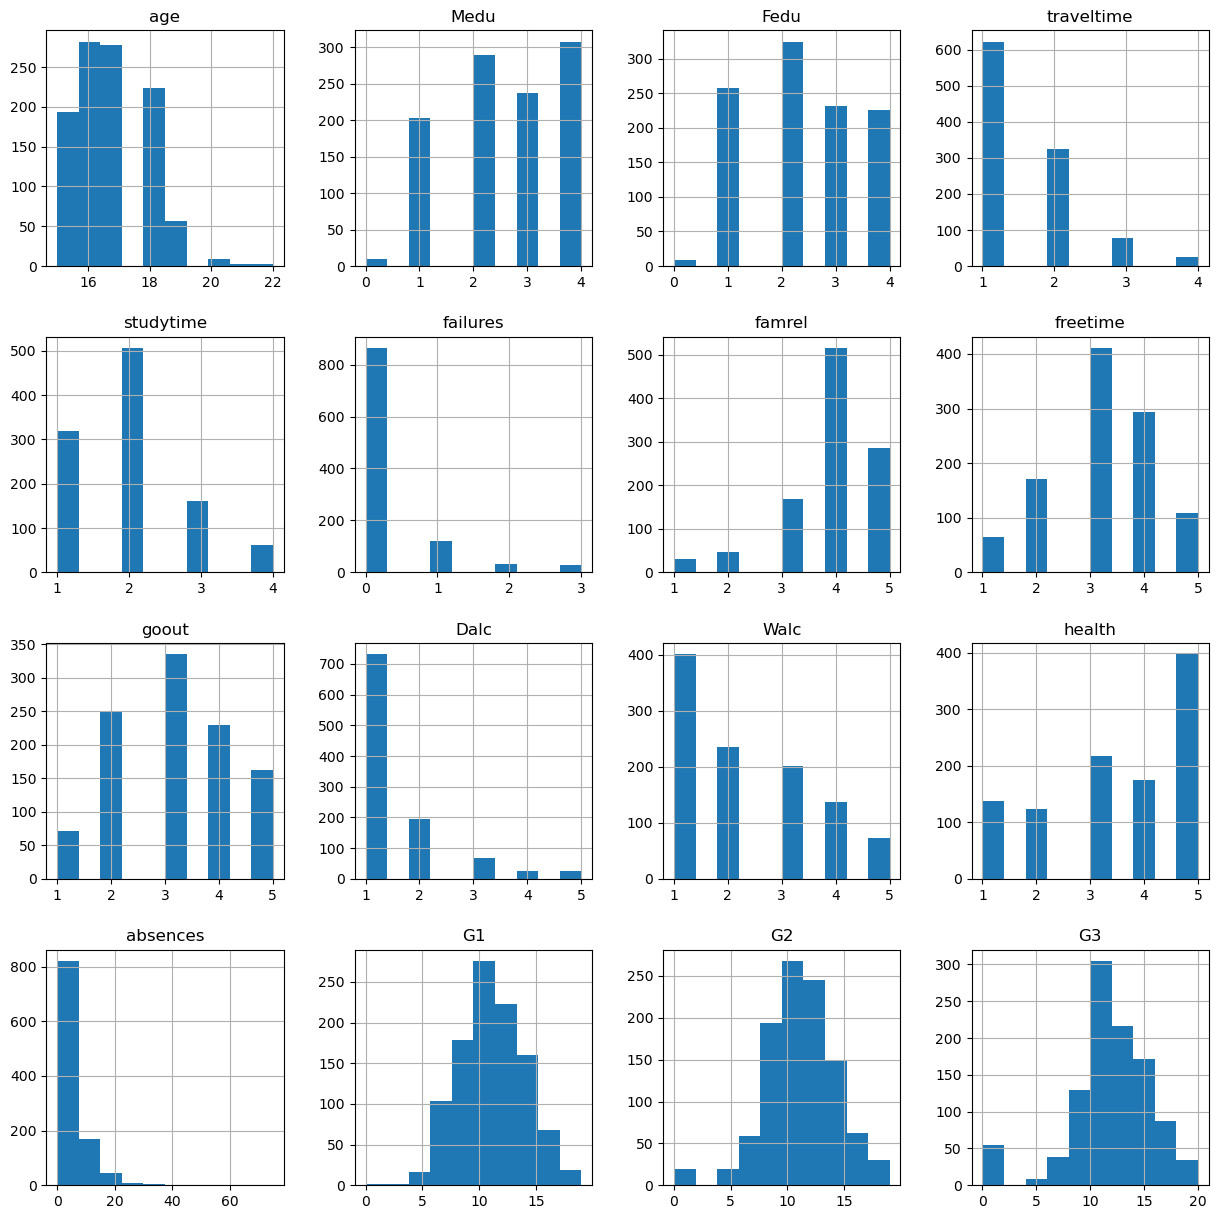

In [ ]:
import matplotlib.pyplot as plt 

hist = df.hist(bins=10,figsize =(15,15))
plt.show()

Given our basic histograms we can see that our G1,G2,G3 grade distributions are fairly normal, which is generally expected for student grades in education. Related to my research question, we can see that the majority of students are in the middle range for our measures of free time and hanging out with friends. It seems the students generally prefer a balance when it comes to relaxing and socializing, though additional plots will need to be generated to predict the impact on school performance. Also related, on our scale out of 4 for study time, the overwhelming majority of students fall within the 2 measure rather than the 3, meaning our students prefer not to study too hard.

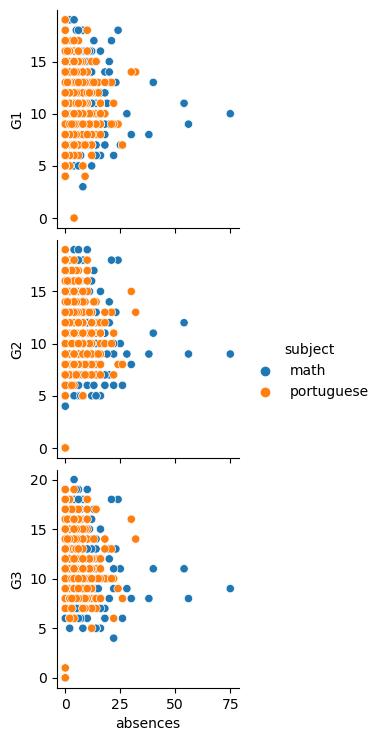

In [ ]:
import seaborn as sns

sns.pairplot(df, hue = "subject", x_vars = ["absences"], y_vars = ["G1", "G2", "G3"] )
plt.show()

In our pairwise plots we can see that the few students who have a large amount of absences do not appear to do particularly well throughout the year. However, many students that failed or were close to failing had zero absences. Since there are only a few students with greater than 25 absences, it can be difficult to say from the plots that students will do much worse the greater their absenses, however we can see a clear drop in the frequency of students with high scores around the 24-25 absences mark with a few exceptions.

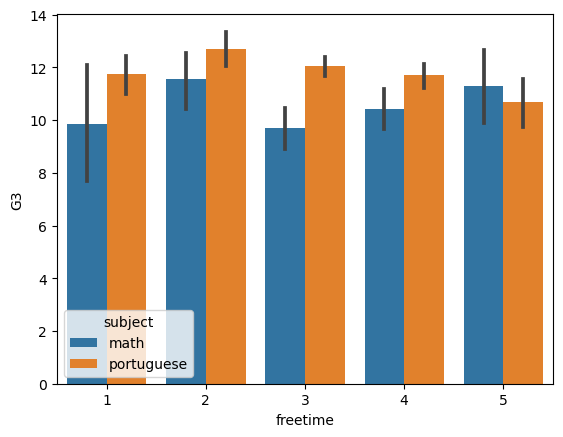

In [ ]:
df_temp = df.copy(deep=True)


freetime_values = ["one", "two", "three", "four", "five"]
df_temp['freetime'].replace(list(range(1,6)), freetime_values, inplace=True) 
sns.barplot(x='freetime', y='G3', data=df, hue="subject")
plt.show()